In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time, datetime

In [2]:
df = pd.read_csv('data/unimelb_training.csv')

/home/charles/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
datetime.datetime.strptime('01/01/08','%d/%m/%y').timetuple()

time.struct_time(tm_year=2008, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=1, tm_isdst=-1)

In [3]:
#check for columns with lot of missing data
counter = 0
for i in range(len(df.columns)):
    if sum(df.loc[:,df.columns[i]].isnull()) > 2000:
        counter += 1
print(counter)

214


In [32]:
#check for common variables
counter = 0
for i in range(27,42):
    print(df.columns[i])

Person.ID.1
Role.1
Year.of.Birth.1
Country.of.Birth.1
Home.Language.1
Dept.No..1
Faculty.No..1
With.PHD.1
No..of.Years.in.Uni.at.Time.of.Grant.1
Number.of.Successful.Grant.1
Number.of.Unsuccessful.Grant.1
A..1
A.1
B.1
C.1


In [5]:
#drop columns with too many missing values
index_of_missing = []
for i in range(df.shape[0]):
    counter = 0
    for j in range(1,16):
        if (df.loc[i,"Person.ID." + str(j)] == None) | (np.isnan(df.loc[i,"Person.ID." + str(j)])):
            counter += 1
    if counter == 15:
        index_of_missing.append(i)

df = df.drop(index_of_missing)
df = df.reset_index()

In [6]:
# clean PHD column and create a column with number of PHD per team
for j in range(1,14):
    df["With.PHD." + str(j)] = df["With.PHD." + str(j)].str.replace('\s+', '')

df["#PHD_team"] = 0
    
for i in range(df.shape[0]):
    total_phd = 0
    for j in range(1,14):
        if df.loc[i,"With.PHD." + str(j)] == "Yes" :
            total_phd += 1
    df.loc[i,"#PHD_team"] += total_phd

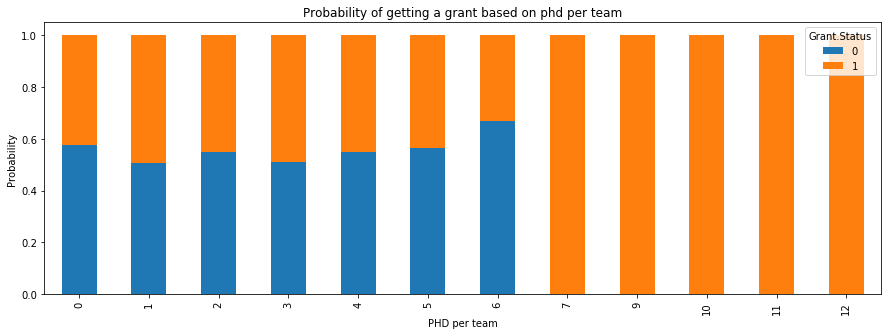

In [29]:
#create a chart to check the correlation between number of phd per team and grant given
pd.crosstab(df["#PHD_team"], df["Grant.Status"]).apply(lambda r: r/r.sum(), axis=1).plot(kind = 'bar',stacked=True, figsize = (15, 5))
plt.title('Probability of getting a grant based on phd per team')
plt.xlabel('PHD per team')
plt.ylabel('Probability')
plt.show()

In [40]:
# check for the importance of Australian nationality in a team in order to get a grant 
for j in range(1,14):
    df["Country.of.Birth." + str(j)] = df["Country.of.Birth." + str(j)].str.replace('\s+', '')

df["#Australians"] = 0
    
for i in range(df.shape[0]):
    total_australians = 0
    for j in range(1,16):
        if df.loc[i,"Country.of.Birth." + str(j)] == "Australia" :
            total_australians += 1
    df.loc[i,"#Australians"] += total_australians

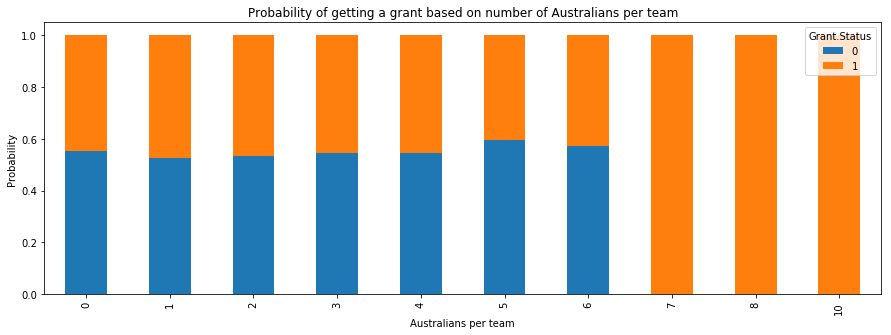

In [46]:
#create a chart to check the correlation between number of australians per team and grant given
pd.crosstab(df["#Australians"], df["Grant.Status"]).apply(lambda r: r/r.sum(), axis=1).plot(kind = 'bar',stacked=True, figsize = (15, 5))
plt.title('Probability of getting a grant based on number of Australians per team')
plt.xlabel('Australians per team')
plt.ylabel('Probability')
plt.show()

In [98]:
# check for the importance of successfull grant in a team in order to get a grant 
for j in range(1,16):
    df["Number.of.Successful.Grant." + str(j)] = df["Number.of.Successful.Grant." + str(j)].fillna(0)
    
df["#succ_grant"] = 0
    
for i in range(df.shape[0]):
    total_succ_grants = 0
    for j in range(1,16):
        total_succ_grants += df.loc[i,"Number.of.Successful.Grant." + str(j)]
    df.loc[i,"#succ_grant"] += total_succ_grants

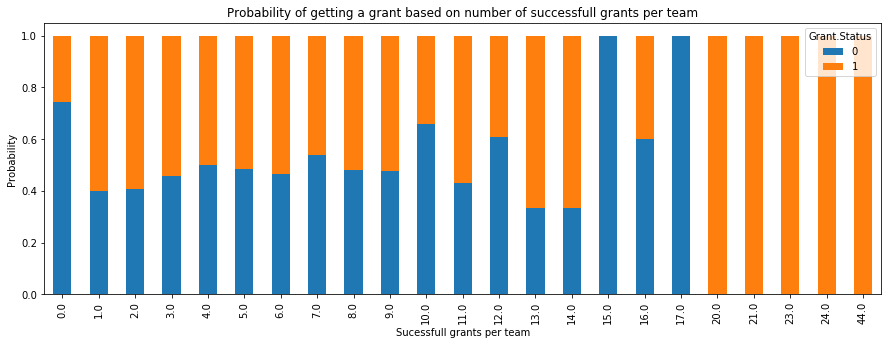

In [100]:
#create a chart to check the correlation between number of successfull grant per team and grant given
pd.crosstab(df["#succ_grant"], df["Grant.Status"]).apply(lambda r: r/r.sum(), axis=1).plot(kind = 'bar',stacked=True, figsize = (15, 5))
plt.title('Probability of getting a grant based on number of successfull grants per team')
plt.xlabel('Sucessfull grants per team')
plt.ylabel('Probability')
plt.show()

In [ ]:
regex = 'Role\..?'

In [73]:
list1 = []
for col in df.filter(regex = regex, axis =1):
    list1.append(df[col].unique())
list1 = np.hstack(list1)
list1 = list(set(list1))[1:]

In [74]:
list1

['HONVISIT',
 'EXTERNAL_ADVISOR',
 'DELEGATED_RESEARCHER',
 'STUDRES',
 'PRINCIPAL_SUPERVISOR',
 'STUD_CHIEF_INVESTIGATOR',
 'CHIEF_INVESTIGATOR',
 'EXT_CHIEF_INVESTIGATOR']

In [6]:
df.iloc[1]

Grant.Application.ID                                        2
Grant.Status                                                1
Sponsor.Code                                               2B
Grant.Category.Code                                       10A
Contract.Value.Band...see.note.A                           B 
Start.date                                           11/11/05
RFCD.Code.1                                            280103
RFCD.Percentage.1                                          30
RFCD.Code.2                                            280106
RFCD.Percentage.2                                          30
RFCD.Code.3                                            280203
RFCD.Percentage.3                                          40
RFCD.Code.4                                                 0
RFCD.Percentage.4                                           0
RFCD.Code.5                                                 0
RFCD.Percentage.5                                           0
SEO.Code